In [26]:
# IMAGE ENCRYPTION USING ALGEBRAIC S-BOX AND GALOIS FIELD

In [27]:
# STEP 1/3: Generation of 8x8 an S-box (and correspondingly, invertible S-box)

In [28]:
# Variable Initializations
a=1         # Initial condition
b=2         # Generator, g=2 (00000010)
mod=2**8    # Degree, n=8 ; S-box has g**n = 2**8 = 256 entries (8x8 S-box, meaning 8 inputs yields 8 outputs) 
d=16        # Dimensions of S-box: 16x16

# Matrix Initializations
sbox        = [[0 for i in xrange(d)] for i in xrange(d)]    # S-box
G           = [[0 for i in xrange(d)] for i in xrange(d)]    # Multiplicative Cyclic Group, G
invert_G    = [[0 for i in xrange(d)] for i in xrange(d)]    # Complement of G
flag        = [[0 for i in xrange(d)] for i in xrange(d)]    # Flag matrix, to check if all values in range(0,255) are in group G
invert_sbox = [[0 for i in xrange(d)] for i in xrange(d)]    # Invertible S-box

In [29]:
# Computing elements of G (each value in G signify exponential representations of generator, g) 
for i in xrange(d):
    for j in xrange(d):
        if i==0 and j==0:               # Base case
            G[i][j] = 0 
        else:
            # Compute Polynomial multiplication of a and b bit by bit
            p = 0                       # Initializing product = 0
            for counter in xrange(8):   # Values a and b are in range(0,255) so we have 8 bits 
                if b&1 == 1:            # Check if the rightmost bit (LSB) in b equals 1
                    p=p^a               # If true, XOR product with a
                b>>=1                   # Right shift b (Divide b by 2)
                carry = a&0x80          # Before Left shifting a, store the Leftmost bit (MSB) in carry
                a<<=1                   # Now Left shift a
                if carry == 0x80:       # Check if carry equals 1
                    a = a^0x71          # If true, XOR a with 0x71; 0x71 (0111 0001) corresponds to irreducible polynomial f(x)
                                        # In the Research paper, f(x) = x^8+x^6+x^5+x^4+1 = (1 0111 0001) in binary, now you know :)  
            # Multiplication ends here

            p%=mod                      # product mod 256
            flag[p/16][p%16]=1          # set flag corresponding to product
            G[p/16][p%16]=i*16+j        # update G
            a=p                         # for the next iteration, use previously calculated product
            b=2                         # reset b to 2 
            
# Display G
print('\nTABLE-1: CYCLIC MULTIPLICATIVE GROUP, G:\n')
print('\n'.join([''.join(['{:4}'.format(i) for i in j]) for j in G]))


TABLE-1: CYCLIC MULTIPLICATIVE GROUP, G:

   0 255   1 231   2 207 232  59   3  35 208 154 233  20  60 183
   4 159  36  66 209 118 155 251 234 245  21  11  61 130 184 146
   5 122 160  79  37 113  67 106 210 224 119 221 156 242 252  32
 235 213 246 135  22  42  12 140  62 227 131  75 185 191 147  94
   6  70 123 195 161  53  80 167  38 109 114 203  68  51 107  49
 211  40 225 189 120 111 222 240 157 116 243 128 253 205  33  18
 236 163 214  98 247  55 136 102  23  82  43 177  13 169 141  89
  63   8 228 151 132  72  76 218 186 125 192 200 148 197  95 174
   7 150  71 217 124 199 196 173 162  97  54 101  81 176 168  88
  39 188 110 239 115 127 204  17  69 194  52 166 108 202  50  48
 212 134  41 139 226  74 190  93 121  78 112 105 223 220 241  31
 158  65 117 250 244  10 129 145 254 230 206  58  34 153  19 182
 237  15 164  46 215 171  99  86 248 143  56 180 137  91 103  29
  24  25  83  26  44  84 178  27  14  45 170  85 142 179  90  28
  64 249   9 144 229  57 152 181 133 138  73  9

In [30]:
# Display Flag
print('\nFLAG MATRIX:\n')
print('\n'.join([''.join(['{:4}'.format(i) for i in j]) for j in flag]))


FLAG MATRIX:

   0   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1  

In [31]:
# Invertible G (Swapped indexes of a with b in a:g^b)
for i in xrange(d):
    for j in xrange(d):
        index = G[i][j]
        invert_G[index/16][index%16] = 16*i+j
        
# Display Invertible G
print('\nTABLE-1.5: INVERTIBLE G\n')
print('\n'.join([''.join(['{:4}'.format(i) for i in j]) for j in invert_G]))


TABLE-1.5: INVERTIBLE G

   0   2   4   8  16  32  64 128 113 226 181  27  54 108 216 193
 243 151  95 190  13  26  52 104 208 209 211 215 223 207 239 175
  47  94 188   9  18  36  72 144  81 162  53 106 212 217 195 247
 159  79 158  77 154  69 138 101 202 229 187   7  14  28  56 112
 224 177  19  38  76 152  65 130 117 234 165  59 118 236 169  35
  70 140 105 210 213 219 199 255 143 111 222 205 235 167  63 126
 252 137  99 198 253 139 103 206 237 171  39  78 156  73 146  85
 170  37  74 148  89 178  21  42  84 168  33  66 132 121 242 149
  91 182  29  58 116 232 161  51 102 204 233 163  55 110 220 201
 227 183  31  62 124 248 129 115 230 189  11  22  44  88 176  17
  34  68 136  97 194 245 155  71 142 109 218 197 251 135 127 254
 141 107 214 221 203 231 191  15  30  60 120 240 145  83 166  61
 122 244 153  67 134 125 250 133 123 246 157  75 150  93 186   5
  10  20  40  80 160  49  98 196 249 131 119 238 173  43  86 172
  41  82 164  57 114 228 185   3   6  12  24  48  96 192 241 147

In [32]:
# Generation of S-box
phi = 1
for i in xrange(d):
    for j in xrange(d):
        if 16*i+j == 0:                 # Base case in S-box, for index (16*i+j)=0, phi(0)=1 (as mentioned in Paper)  
            sbox[i][j] = phi 
        elif 16*i+j == 230:             # Exception case 1: index=230
            index = (phi+12+1)%mod      # At this point, phi = 255; adding 1 for adjusting index after mod
            phi = invert_G[index/16][index%16]
            sbox[i][j] = phi 
        elif 16*i+j == 234:             # Exception case 2: index=234
            index = (phi+18)%mod
            phi = invert_G[index/16][index%16]
            sbox[i][j] = phi
        elif 16*i+j == 255:             # Last element in S-box; phi(255)=0  
            sbox[i][j] = 0
        else:
            index = phi
            phi = invert_G[index/16][index%16]
            sbox[i][j] = phi

# Display S-box
print('\nTABLE-2: GENERATED S-BOX:\n')
print('\n'.join([''.join(['{:4}'.format(i) for i in j]) for j in sbox]))


TABLE-2: GENERATED S-BOX:

   1   2   4  16 243  90 222  86 199 133 232   6  64 224  41 162
 136 102 103 206 186 120  84 213  49  79  35   9 226 164 194 153
 189  83 210  40  81 140  55 101 139 163  97 137 204 150 129 182
 191  61  28 223 172 251  23 104 237 192 122  33  94  63 112 170
 218 119  42  53  69 152 230 185  60  14 216 249 225  82 105 171
 197 125 121 168 142 220 173 135  51  77 236  96 252  46 195  67
  38  72 117 178 214  98  99 198 250 179 221  43 106  39 144 227
  57 229 228 114  74 165 245  25 209  20  13 108 156  44 212 160
  34 188 145 183  15 193 244 180 203  75  59   7 128  91 205  93
 167  71 130  29 207   5  32  47 247 100 253  92 235  48 159  17
 151 115 148 124 132 116  89 111  85 219 238 241 174 127 149 248
 200 123  66  19 190 166 155  22  52 154  11  27 215 196 134 161
  68  76 118  21  26 211  80  70  65 177 107  78 169 109  73 234
  24 208  10 181 231   3   8 113  37  36  18  95 126 242  45 217
 131  58 187 240  87 255  54 138 233  12 239 147  62  56 202 1

In [33]:
# Invertible S-box
for i in xrange(d):
    for j in xrange(d):
        index = sbox[i][j]
        invert_sbox[index/16][index%16] = 16*i+j

# Display Invertible S-box
print('\nTABLE-3: INVERTIBLE S-BOX:\n')
print('\n'.join([''.join(['{:4}'.format(i) for i in j]) for j in invert_sbox]))


TABLE-3: INVERTIBLE S-BOX:

 255   0   1 213   2 149  11 139 214  27 210 186 233 122  73 132
   3 159 218 179 121 195 183  54 208 119 196 187  50 147 254 250
 150  59 128  26 217 216  96 109  35  14  66 107 125 222  93 151
 157  24 244  88 184  67 230  38 237 112 225 138  72  49 236  61
  12 200 178  95 192  68 199 145  97 206 116 137 193  89 203  25
 198  36  77  33  22 168   7 228 240 166   5 141 155 143  60 219
  91  42 101 102 153  39  17  18  55  78 108 202 123 205 248 167
  62 215 115 161 165  98 194  65  21  82  58 177 163  81 220 173
 140  46 146 224 164   9 190  87  16  43 231  40  37 247  84 241
 110 130 249 235 162 174  45 160  69  31 185 182 124 239 245 158
 127 191  15  41  29 117 181 144  83 204  63  79  52  86 172 251
 246 201  99 105 135 211  47 131 253  71  20 226 129  32 180  48
  57 133  30  94 189  80 103   8 176 242 238 136  44 142  19 148
 209 120  34 197 126  23 100 188  74 223  64 169  85 106   6  51
  13  76  28 111 114 113  70 212  10 232 207 156  90  56 170 

In [34]:
                                                 # END STEP-1/3


In [50]:
# STEP 2/3: Image Encryption And Performance Analysis (3 PARTs)

In [51]:
# PART A: Implementing Image Encryption Scheme as in the Research Paper 
# a. Partial Encryption of a 512x512 image using S-box
# b. Full Encryption by perform 10 iterations using Arnold Transform 

In [36]:
from PIL import Image
import numpy as np

im = Image.open("pepper.bmp")
im2 = im
from __future__ import print_function
print(im.format, im.size, im.mode)

BMP (512, 512) RGB



Image to be used for the actual Encryption-Decryption


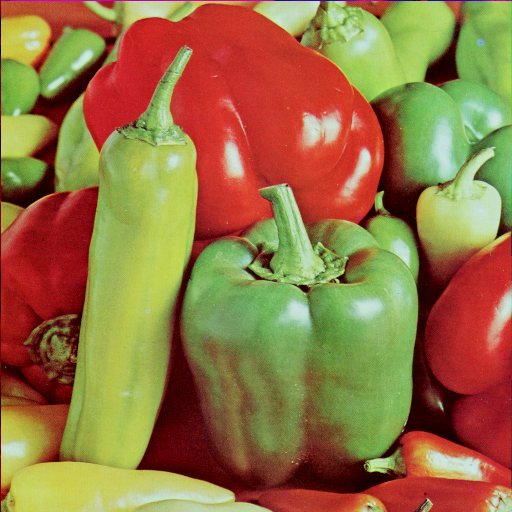

In [37]:
print('\nImage to be used for the actual Encryption-Decryption')
im

In [39]:
im.show() # Use im.show() if xv utility is installed


Encrypted Image Using S-box:


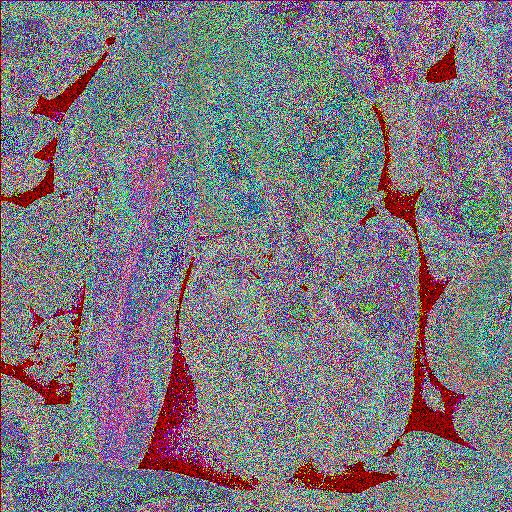

In [40]:
# Encryption using S-box

pixel_values = list(im.getdata())   # Get pixel data of RGB values for each pixel 
m,n = im.size                       # dimensions of image
conv_pixel_values = [(0,0,0) for i in xrange(512*512)]

for i in range(m):
    for j in range(m):
        red,green,blue = pixel_values[m*i+j]
        conv_pixel_values[m*i+j] = sbox[red/16][red%16],sbox[green/16][green%16],sbox[blue/16][blue%16]

# Show Pixel info (RGB) in list format and display it as an Encrypted Image
im3 = Image.new(im.mode, im.size)
im3.putdata(conv_pixel_values)
print('\nEncrypted Image Using S-box:')
im3


Encrypted Image Using Arnold Transform:


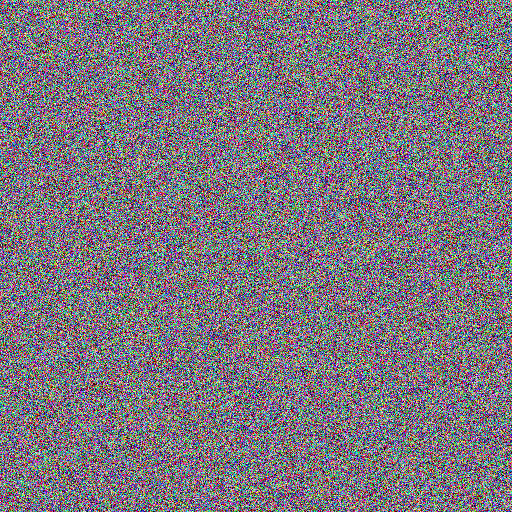

In [41]:
# ALGORITHM-1
# Full Encryption Using Arnold Transform (no. of Iterations=10)

inp = list(im3.getdata()) 
m,n = im.size

iter = 10
for j in range(iter):
    out = [(0,0,0) for i in xrange(512*512)]
    for x in range(m):
        for y in range(m):
            p = [(x+y)%m,(x+2*y)%m]            # p = [ 1 1 ; 1 2 ] * [ x ; y ]
            out[m*x+y] = inp[m*p[0]+p[1]]
    inp = out
    
imArn = Image.new(im.mode, im.size)
imArn.putdata(out)
print('\nEncrypted Image Using Arnold Transform:')
imArn


Decrypted Image Using Inverse Arnold Transform:


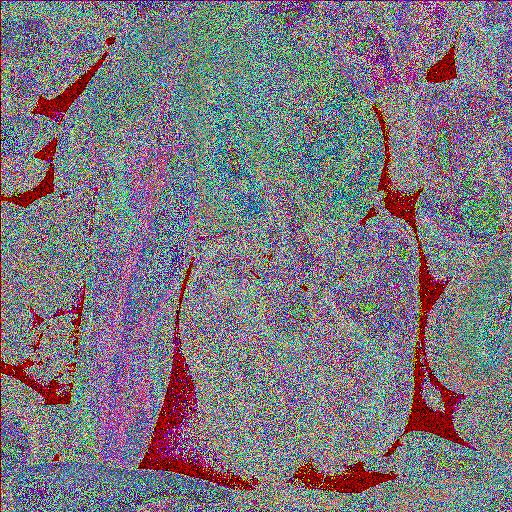

In [42]:
# Decryption Using Inverse Arnold Transform (no. of Iterations=10)

inp = list(imArn.getdata()) 
m,n = im.size

iter = 10
for j in range(iter):
    out = [(0,0,0) for i in xrange(512*512)]
    for x in range(m):
        for y in range(m):
            p = [(2*x-y)%m,(-x+y)%m]         # p = [ 2 -1 ; -1 1 ] * [ x ; y ]
            out[m*x+y] = inp[m*p[0]+p[1]]
    inp = out

imiArn = Image.new(im.mode, im.size)
imiArn.putdata(out)
print('\nDecrypted Image Using Inverse Arnold Transform:')
imiArn


Decrypted Image Using Invertible S-box:


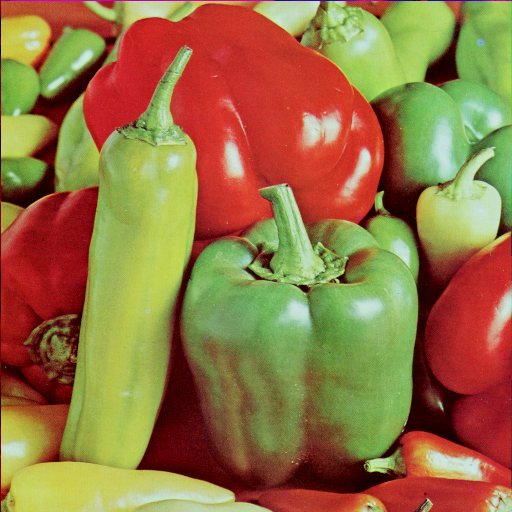

In [43]:
# Decryption using Invertible S-box

pixel_values = list(imiArn.getdata()) 
m,n = im.size     # dimension
conv_pixel_values = [(0,0,0) for i in xrange(512*512)]

for i in range(m):
    for j in range(m):
        red,green,blue = pixel_values[m*i+j]
        conv_pixel_values[m*i+j] = invert_sbox[red/16][red%16],invert_sbox[green/16][green%16],invert_sbox[blue/16][blue%16]

# Show Pixel info (RGB) in list format and display it as an Encrypted Image
im4 = Image.new(im.mode, im.size)
im4.putdata(conv_pixel_values)
print('\nDecrypted Image Using Invertible S-box:')
im4


Encrypted Image Using Arnold Transform:


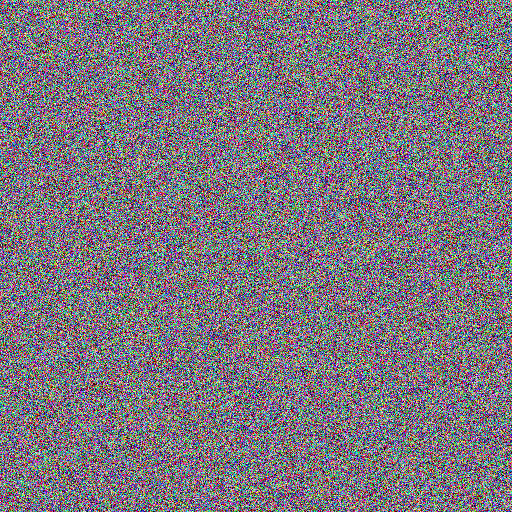

In [44]:
# ALGORITHM-2
# Full Encryption Using Arnold Transform (no. of Iterations=10)

inp = list(im3.getdata()) 
m,n = im.size
out = [(0,0,0) for i in xrange(512*512)]

iter = 10
#for j in range(iter):
for x in range(m):
     for y in range(m):
        x1,y1=x,y
        for k in range(iter):
            p = [(x1+y1)%m,(x1+2*y1)%m]        # p = [ 1 1 ; 1 2 ] * [ x ; y ]
            x1,y1=p[0],p[1]
        out[m*x+y] = inp[m*p[0]+p[1]]
    
imArn = Image.new(im.mode, im.size)
imArn.putdata(out)
print('\nEncrypted Image Using Arnold Transform:')
imArn


Decrypted Image Using Inverse Arnold Transform:


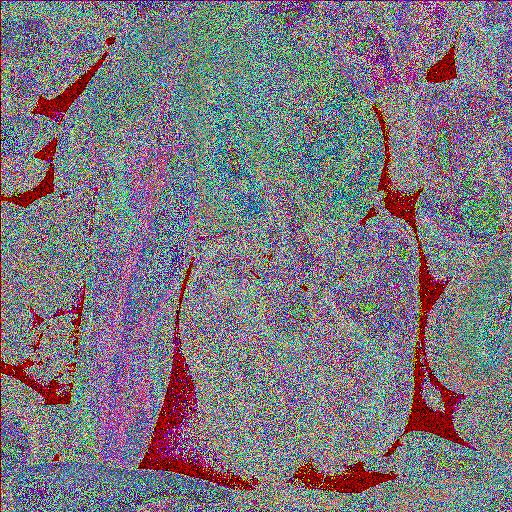

In [45]:
# Decryption Using Inverse Arnold Transform (no. of Iterations=10)

inp = list(imArn.getdata())
m,n = im.size
out = [(0,0,0) for i in xrange(512*512)]

iter = 10
#for j in range(iter):
for x in range(m):
    for y in range(m):
        x1,y1=x,y
        for k in range(iter):
            p = [(2*x1-y1)%m,(-x1+y1)%m]         # p = [ 2 -1 ; -1 1 ] * [ x ; y ]
            x1,y1=p[0],p[1]
        out[m*x+y] = inp[m*p[0]+p[1]]

imiArn = Image.new(im.mode, im.size)
imiArn.putdata(out)
print('\nDecrypted Image Using Inverse Arnold Transform:')
imiArn


Decrypted Image Using Invertible S-box:


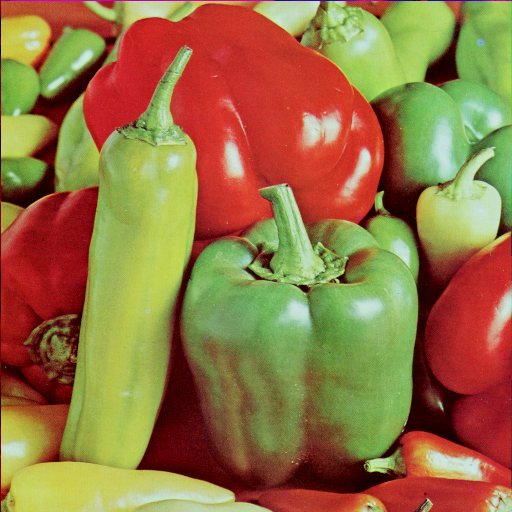

In [46]:
# Decryption using Invertible S-box

pixel_values = list(imiArn.getdata()) 
m,n = im.size
conv_pixel_values = [(0,0,0) for i in xrange(512*512)]

for i in range(m):
    for j in range(m):
        red,green,blue = pixel_values[m*i+j]
        conv_pixel_values[m*i+j] = invert_sbox[red/16][red%16],invert_sbox[green/16][green%16],invert_sbox[blue/16][blue%16]

# Show Pixel info (RGB) in list format and display it as an Encrypted Image
im4 = Image.new(im.mode, im.size)
im4.putdata(conv_pixel_values)
print('\nDecrypted Image Using Invertible S-box:')
im4

In [52]:
                                                # END PART A
    

In [54]:
# PART B: Implementing Novel Image Encryption Scheme proposed by Musheer Sir et al.

In [57]:
                                                # END PART B
    

In [53]:
# PART C: Performance Analysis

In [56]:
                                                # END PART C
    